# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

Overall Price summary:
count    8.860000e+02
mean     6.944931e+05
std      2.911022e+05
min      1.880000e+05
25%      4.617500e+05
50%      6.405000e+05
75%      8.470000e+05
max      1.424875e+06
Name: Price, dtype: float64 

Price by Make:
           count          mean            std        min         25%  \
Make                                                                   
MG Motors   17.0  1.424875e+06       0.000000  1424875.0  1424875.00   
Kia          8.0  1.417891e+06   19754.795699  1369000.0  1424875.00   
Jeep         4.0  1.391156e+06   67437.500000  1290000.0  1391156.25   
Mahindra    18.0  1.097938e+06  170835.523808   796000.0  1037000.00   
Tata        23.0  9.380978e+05  381443.095580   188000.0   779500.00   
Nissan       4.0  8.842500e+05  289559.867155   475000.0   782500.00   
Skoda        5.0  8.327750e+05  486516.896546   436000.0   466000.00   
Honda       73.0  7.974366e+05  262489.340990   316000.0   581000.00   
Ford        43.0  7.247674e+05  1524

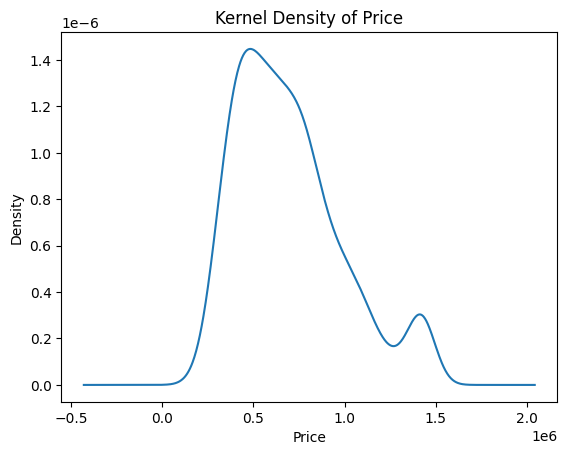

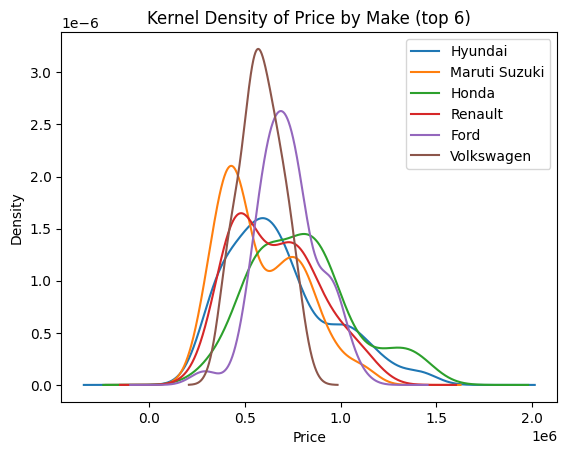

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Transmission']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Transmission']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Transmission']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without 

Part 4: Model performance
Numeric-only:
  R^2 (train) = 0.3336 | RMSE (train) = 239,164.27
  R^2 (test)  = 0.3461 | RMSE (test)  = 228,329.81

Categorical-only:
  R^2 (train) = 0.6471 | RMSE (train) = 174,044.00
  R^2 (test)  = 0.6109 | RMSE (test)  = 176,131.31

Combined (numeric + categorical):
  R^2 (train) = 0.7849 | RMSE (train) = 135,884.35
  R^2 (test)  = 0.7536 | RMSE (test)  = 140,152.99

Part 5: PolynomialFeatures (numeric-only)
  degree=1: R^2(test)=0.3461, RMSE(test)=228,329.81 | R^2(train)=0.3336, RMSE(train)=239,164.27
  degree=2: R^2(test)=0.3725, RMSE(test)=223,667.84 | R^2(train)=0.3683, RMSE(train)=232,862.64
  degree=3: R^2(test)=0.3545, RMSE(test)=226,854.06 | R^2(train)=0.3656, RMSE(train)=233,346.01
  degree=4: R^2(test)=0.3594, RMSE(test)=225,996.91 | R^2(train)=0.3687, RMSE(train)=232,789.51
  degree=5: R^2(test)=0.3527, RMSE(test)=227,177.91 | R^2(train)=0.3635, RMSE(train)=233,739.00
Best polynomial degree by RMSE(test): 2

Best overall model on test set: Comb

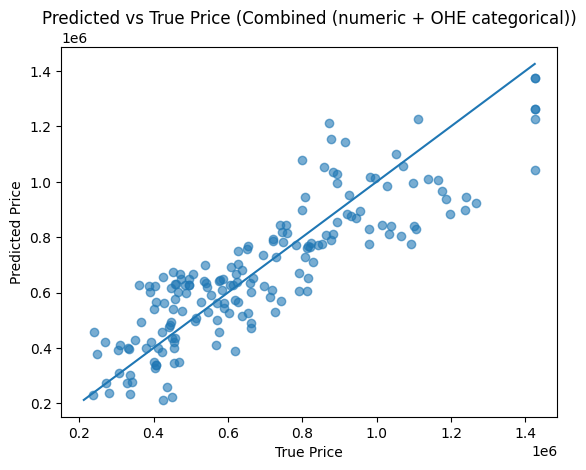

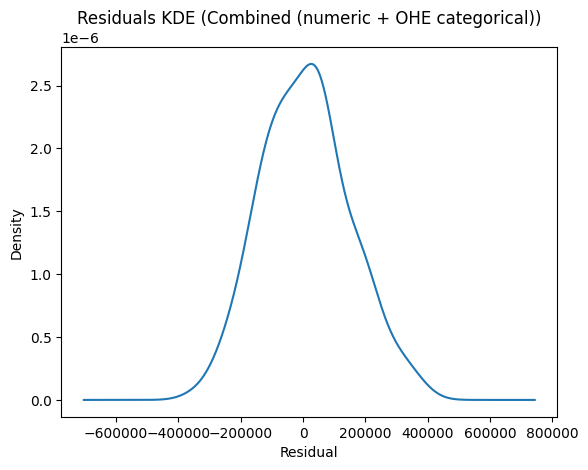

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from math import sqrt

def winsorize_iqr(series: pd.Series) -> pd.Series:
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series.clip(lower, upper)

def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# 1

DATA_PATH = Path("./data/cars_hw.csv")
df = pd.read_csv(DATA_PATH)

df.columns = [c.strip().replace(" ", "_") for c in df.columns]
cols = ["Price","Color","Seating_Capacity","Body_Type","Make","Make_Year",
        "Mileage_Run","Fuel_Type","Transmission","Transmission_Type"]
df = df[cols].copy()

for c in ["Price","Seating_Capacity","Make_Year","Mileage_Run","Transmission"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# cleaning
df = df.drop_duplicates()
df = df.dropna(subset=["Price","Make","Make_Year","Mileage_Run"])
df = df[df["Price"] > 0]

df["Price"] = winsorize_iqr(df["Price"])
df["Mileage_Run"] = winsorize_iqr(df["Mileage_Run"])

# 2
print("Overall Price summary:")
print(df["Price"].describe(), "\n")

print("Price by Make:")
by_make = df.groupby("Make")["Price"].describe().sort_values("mean", ascending=False)
print(by_make.head(10), "\n")

df["Price"].plot(kind="kde", title="Kernel Density of Price")
plt.xlabel("Price"); plt.ylabel("Density")
plt.show()

top_makes = df["Make"].value_counts().head(6).index.tolist()
for mk in top_makes:
    df.loc[df["Make"]==mk, "Price"].plot(kind="kde")
plt.title("Kernel Density of Price by Make (top 6)")
plt.xlabel("Price"); plt.ylabel("Density")
plt.legend(top_makes)
plt.show()

# 3
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 4
numeric_cols = ["Seating_Capacity","Make_Year","Mileage_Run","Transmission"]
categorical_cols = ["Color","Body_Type","Make","Fuel_Type","Transmission_Type"]

X_train_num = train_df[numeric_cols]
X_test_num  = test_df[numeric_cols]
y_train = train_df["Price"].values
y_test  = test_df["Price"].values

# numeric-only
num_model = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("lin", LinearRegression())
])
num_model.fit(X_train_num, y_train)
yhat_tr_num = num_model.predict(X_train_num)
yhat_te_num = num_model.predict(X_test_num)

# categorical-only
X_train_cat = train_df[categorical_cols]
X_test_cat  = test_df[categorical_cols]
cat_model = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore")),
    ("lin", LinearRegression())
])
cat_model.fit(X_train_cat, y_train)
yhat_tr_cat = cat_model.predict(X_train_cat)
yhat_te_cat = cat_model.predict(X_test_cat)

# (c) combined
X_train_all = train_df[categorical_cols + numeric_cols]
X_test_all  = test_df[categorical_cols + numeric_cols]
preprocess = ColumnTransformer([
    ("num", Pipeline([("impute", SimpleImputer(strategy="median"))]), numeric_cols),
    ("cat", Pipeline([
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore"))
    ]), categorical_cols),
])
combined_model = Pipeline([
    ("prep", preprocess),
    ("lin", LinearRegression())
])
combined_model.fit(X_train_all, y_train)
yhat_tr_all = combined_model.predict(X_train_all)
yhat_te_all = combined_model.predict(X_test_all)

def show_metrics(name, ytr, yte):
    print(f"{name}:")
    print(f"  R^2 (train) = {r2_score(y_train, ytr):.4f} | RMSE (train) = {rmse(y_train, ytr):,.2f}")
    print(f"  R^2 (test)  = {r2_score(y_test,  yte):.4f} | RMSE (test)  = {rmse(y_test,  yte):,.2f}\n")

print("Part 4: Model performance")
show_metrics("Numeric-only", yhat_tr_num, yhat_te_num)
show_metrics("Categorical-only", yhat_tr_cat, yhat_te_cat)
show_metrics("Combined (numeric + categorical)", yhat_tr_all, yhat_te_all)

# 5
print("Part 5: PolynomialFeatures (numeric-only)")
best_deg = None
best_rmse = float("inf")
best_poly_preds = None
for deg in [1,2,3,4,5]:
    poly_model = Pipeline([
        ("impute", SimpleImputer(strategy="median")),
        ("poly", PolynomialFeatures(degree=deg, include_bias=False)),
        ("lin", LinearRegression())
    ])
    poly_model.fit(X_train_num, y_train)
    pred_tr = poly_model.predict(X_train_num)
    pred_te = poly_model.predict(X_test_num)
    r2_tr, r2_te = r2_score(y_train, pred_tr), r2_score(y_test, pred_te)
    rmse_tr, rmse_te = rmse(y_train, pred_tr), rmse(y_test, pred_te)
    print(f"  degree={deg}: R^2(test)={r2_te:.4f}, RMSE(test)={rmse_te:,.2f} | R^2(train)={r2_tr:.4f}, RMSE(train)={rmse_tr:,.2f}")
    if rmse_te < best_rmse:
        best_rmse = rmse_te
        best_deg = deg
        best_poly_preds = pred_te
best_poly_name = f"Polynomial numeric-only (degree={best_deg})"
print(f"Best polynomial degree by RMSE(test): {best_deg}\n")

# 6
combined_rmse = rmse(y_test, yhat_te_all)
poly_rmse = rmse(y_test, best_poly_preds)
if poly_rmse <= combined_rmse:
    best_name = best_poly_name
    best_preds = best_poly_preds
else:
    best_name = "Combined (numeric + OHE categorical)"
    best_preds = yhat_te_all

print("Best overall model on test set:", best_name)
print(f"  R^2(test) = {r2_score(y_test, best_preds):.4f} | RMSE(test) = {rmse(y_test, best_preds):,.2f}\n")

# Predicted vs True scatter
plt.scatter(y_test, best_preds, alpha=0.6)
mn, mx = float(min(np.min(y_test), np.min(best_preds))), float(max(np.max(y_test), np.max(best_preds)))
plt.plot([mn, mx], [mn, mx])
plt.title(f"Predicted vs True Price ({best_name})")
plt.xlabel("True Price"); plt.ylabel("Predicted Price")
plt.show()

# Residuals KDE
residuals = y_test - best_preds
pd.Series(residuals).plot(kind="kde", title=f"Residuals KDE ({best_name})")
plt.xlabel("Residual"); plt.ylabel("Density")
plt.show()

1. Code above
2. Code above. The most expensive car brands are MG Motors, Kia, and Jeep. The prices in general are right skewed distribution, with a few high-end outliers pulling up the mean
3. Code above
4. The R^2 on the train and test set for all three models is shown above. The third model that combines the numerical and categorical performed the best of the three models by far, with the highest R^2 value and the lowest RMSE. It performs ~0.45 R^2 higher than numerical, and ~0.15 higher R^2 than categorical. This means brand/body/fuel/transmission categories carry a lot of price signal, but adding numerics like mileage, year, seating, and transmission count further tightens fit. The combined model’s test error is only ~3% higher than its training error, suggesting mild overfitting at most, whereas the numeric-only model underfits and the categorical-only model captures much more structure but still leaves substantial error that the numerics help close.
5. As you increase polynomial degree on the numeric-only model, test performance improves a bit from degree 1 to degree 2 (R^2 rises from 0.3461 to 0.3725 and RMSE falls from 228,329.81 to 223,667.84), then oscillates or slightly degrades for higher degrees (degrees 3–5 hover around R^2 = 0.35–0.36 and RMSE = 226–227k). R^2 never goes negative on the test set. The best expanded numeric model is at degree 2 with R^2 (test) = 0.3725 and RMSE(test) = 223,667.84. However, this still trails the best overall model from Part 4 (the combined numeric + categorical model), which achieved R^2 (test) = 0.7536 and RMSE(test) = 140,152.99—a much lower error (~83k better RMSE) and far higher explanatory power. In short, polynomial terms help the numeric-only model a little, but categorical information (brand/body/fuel/transmission type) is the real driver of accuracy here.
6. The combined model’s predictions track the true prices fairly well—the cloud of points falls close to the diagonal. The residual KDE is roughly bell-shaped and centered near zero but shows a slight right skew, consistent with a tendency to under-predict the most expensive cars. Strengths: strong out-of-sample fit (≈0.75 R², low RMSE relative to alternatives) and a small train–test gap, meaning the model generalizes well and captures major structure (especially from brand/body/fuel/transmission). Weaknesses: variance grows with price and there’s mild bias at the high end, suggesting remaining nonlinearity and interaction effects.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

Part 1: Survival proportions and ATE
  Control (no transplant) survival = 0.1176
  Treatment (transplant)  survival = 0.3478
  Difference (ATE)                  = 0.2302

Part 2: LPM y ~ 1 + treat
  Intercept (control mean) = 0.1176
  Coef on treat (ATE)      = 0.2302

Part 3: LPM y ~ 1 + treat + age
  Intercept   = 0.7020
  treat coef  = 0.2647
  age  coef   = -0.0136

Part 4: Flexible models (test metrics)
  degree=1: AUC=0.8083, LogLoss=0.4760, Acc=0.7692
  degree=2: AUC=0.8233, LogLoss=0.4554, Acc=0.7692
  degree=3: AUC=0.8308, LogLoss=0.4456, Acc=0.8077
  degree=4: AUC=0.8233, LogLoss=0.4435, Acc=0.8462

Best model by LogLoss: degree=4 (AUC=0.8233, LogLoss=0.4435, Acc=0.8462)



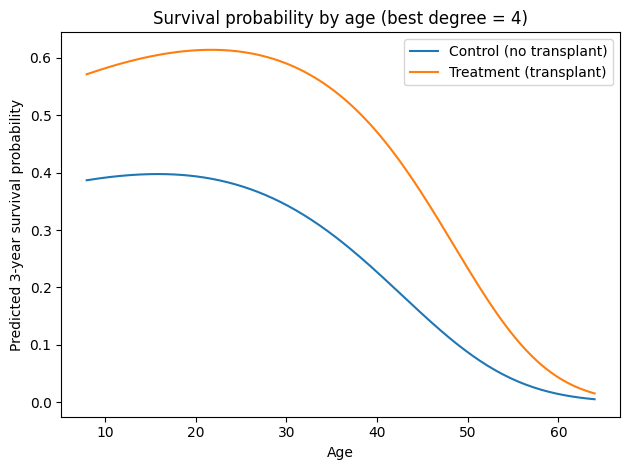

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score

DATA_PATH = Path("./data/heart_hw.csv")
df = pd.read_csv(DATA_PATH)

# normalize column names
df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]

df['y'] = pd.to_numeric(df['y'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['transplant'] = df['transplant'].astype(str).str.strip().str.lower()
df = df.dropna(subset=['y','age','transplant'])
df = df[(df['transplant']=='control') | (df['transplant']=='treatment')].copy()
df['treat'] = (df['transplant']=='treatment').astype(int)

# 1
p_control = df.loc[df['treat']==0, 'y'].mean()
p_treat   = df.loc[df['treat']==1, 'y'].mean()
ate = p_treat - p_control
print("Part 1: Survival proportions and ATE")
print(f"  Control (no transplant) survival = {p_control:.4f}")
print(f"  Treatment (transplant)  survival = {p_treat:.4f}")
print(f"  Difference (ATE)                  = {ate:.4f}\n")

# 2
X1 = df[['treat']].values
y  = df['y'].values
lm1 = LinearRegression().fit(X1, y)
print("Part 2: LPM y ~ 1 + treat")
print(f"  Intercept (control mean) = {lm1.intercept_:.4f}")
print(f"  Coef on treat (ATE)      = {lm1.coef_[0]:.4f}\n")

# 3
X2 = df[['treat','age']].values
lm2 = LinearRegression().fit(X2, y)
print("Part 3: LPM y ~ 1 + treat + age")
print(f"  Intercept   = {lm2.intercept_:.4f}")
print(f"  treat coef  = {lm2.coef_[0]:.4f}")
print(f"  age  coef   = {lm2.coef_[1]:.4f}\n")

# 4
train, test = train_test_split(df, test_size=0.25, random_state=42, stratify=df['y'])

def build_features(frame, degree, poly_obj=None, fit_poly=False):
    age = frame[['age']].to_numpy()
    if poly_obj is None:
        poly_obj = PolynomialFeatures(degree=degree, include_bias=False)
    if fit_poly:
        age_poly = poly_obj.fit_transform(age)
    else:
        age_poly = poly_obj.transform(age)
    treat = frame[['treat']].to_numpy()
    inter = treat * age_poly
    X = np.hstack([treat, age_poly, inter])
    return X, poly_obj

degrees = [1,2,3,4]
results = []
best = None

for d in degrees:
    X_tr, poly = build_features(train, d, poly_obj=None, fit_poly=True)
    X_te, _    = build_features(test,  d, poly_obj=poly,  fit_poly=False)

    scaler = StandardScaler()
    X_tr_s = scaler.fit_transform(X_tr)
    X_te_s = scaler.transform(X_te)

    logit = LogisticRegression(max_iter=5000)
    logit.fit(X_tr_s, train['y'].to_numpy())

    p_te = logit.predict_proba(X_te_s)[:,1]
    p_tr = logit.predict_proba(X_tr_s)[:,1]

    auc  = roc_auc_score(test['y'].to_numpy(), p_te)
    ll   = log_loss(test['y'].to_numpy(), p_te)
    acc  = accuracy_score(test['y'].to_numpy(), (p_te>=0.5).astype(int))

    results.append((d, auc, ll, acc))
    if (best is None) or (ll < best['logloss']):  # choose by lowest log-loss
        best = {'degree': d, 'poly': poly, 'scaler': scaler, 'model': logit,
                'logloss': ll, 'auc': auc, 'acc': acc}

print("Part 4: Flexible models (test metrics)")
for d, auc, ll, acc in results:
    print(f"  degree={d}: AUC={auc:.4f}, LogLoss={ll:.4f}, Acc={acc:.4f}")
print(f"\nBest model by LogLoss: degree={best['degree']} "
      f"(AUC={best['auc']:.4f}, LogLoss={best['logloss']:.4f}, Acc={best['acc']:.4f})\n")

age_grid = np.linspace(df['age'].min(), df['age'].max(), 200)
age_df = pd.DataFrame({'age': age_grid})

# control
ctrl_df = age_df.copy(); ctrl_df['treat'] = 0
Xc, _ = build_features(ctrl_df, best['degree'], poly_obj=best['poly'], fit_poly=False)
Xc_s  = best['scaler'].transform(Xc)
pc    = best['model'].predict_proba(Xc_s)[:,1]

# treatment
trt_df = age_df.copy(); trt_df['treat'] = 1
Xt, _ = build_features(trt_df, best['degree'], poly_obj=best['poly'], fit_poly=False)
Xt_s  = best['scaler'].transform(Xt)
pt    = best['model'].predict_proba(Xt_s)[:,1]

plt.figure()
plt.plot(age_grid, pc, label="Control (no transplant)")
plt.plot(age_grid, pt, label="Treatment (transplant)")
plt.xlabel("Age"); plt.ylabel("Predicted 3-year survival probability")
plt.title(f"Survival probability by age (best degree = {best['degree']})")
plt.legend()
plt.tight_layout()
plt.show()

1. Code above. The proportion of people who survive in the control group who do not receive a transplant is 0.1176. The proportion of people who survive in the treatment group is 0.3478. This is a 0.2302 difference.

2. The intercept is 0.1176, which equals the control group’s survival rate. The coefficient on transplant is 0.2302, which equals the difference in survival rates between treatment and control. Thus, this regression exactly reproduces the proportions from part 1: the intercept is the control mean and the treatment coefficient is the treatment–control difference.

3. By adding age, the intercept becomes 0.7020 (the predicted survival for a control patient at age 0), the transplant coefficient rises to 0.2647, and the age coefficient is −0.0136. This means that each additional year of age is associated with about a 1.36 percentage-point lower survival probability, holding treatment fixed. After adjusting for age, the estimated transplant benefit increases, suggesting treated patients may have been older/riskier on average.

4. Logistic models with polynomial age terms and interactions show declining survival with age for both groups and higher survival for transplant recipients at all ages. The gap tends to narrow at older ages.

5. Using such models to allocate organs raises serious concerns about fairness and the risk of encoding or amplifying disparities across protected groups, the need to balance objectives like predicted survival against equity and urgency, transparency and accountability so decisions are explainable and appealable, calibration and explicit communication of uncertainty to avoid misallocation, and strong safeguards for privacy and against gaming or strategic behavior.